In [3]:
# Setup and Data Loading
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

# Clone repository if not exists and load data
if not os.path.exists('2155-Challenge-Problem-2'):
    import subprocess
    print("Cloning repository...")
    subprocess.run(['git', 'clone', 'https://github.com/Lyleregenwetter/2155-Challenge-Problem-2'], 
                   check=True, cwd='.')
    print("Repository cloned!")

# Change to the repository directory and load data
os.chdir('2155-Challenge-Problem-2')

# Import utilities
from utils_public import load_grids, plot_n_grids

print("Loading data...")
grids = load_grids()
ratings = np.load("datasets/scores.npy")

print(f"Grids shape: {grids.shape}")
print(f"Ratings shape: {ratings.shape}")
print(f"Available ratings per advisor: {(~np.isnan(ratings)).sum(axis=0)}")

# advisor_names = ["Wellness", "Tax", "Transportation", "Business"]

# Change back to parent directory for saving results
os.chdir('..')

Loading data...
Grids shape: (500000, 7, 7)
Ratings shape: (500000, 4)
Available ratings per advisor: [5000 5000 5000 5000]


In [4]:
# Reload the oracle module to get the latest changes
import importlib
import sys
if 'oracle' in sys.modules:
    importlib.reload(sys.modules['oracle'])
from oracle import TaxOracle

# Initialize Tax Oracle
tax_oracle = TaxOracle()
print("Tax Oracle initialized!")

# Select grids and ratings for Tax advisor (not nan, index 1)
tax_index = 1
grids_subset = grids[~np.isnan(ratings[:, tax_index])]
ratings_subset = ratings[~np.isnan(ratings[:, tax_index]), tax_index]

# Get model scores
model_scores, train_data, test_data = tax_oracle.fit_model(grids_subset, ratings_subset)
print("Model Scores:", model_scores)

predictions = tax_oracle.predict(grids_subset)
print("Predictions shape:", predictions.shape)

Tax Oracle initialized!

Training AutoGluon model for Business Advisor
Available training samples: 5000
Creating features...
Creating features for Business Advisor...
Creating basic features...
Creating spatial features...
Creating interaction features...
Creating economic features...
Total features created: 100
  - Basic: 54
  - Spatial: 27
  - Interaction: 15
  - Economic: 4
Creating features for Business Advisor...
Creating basic features...
Creating spatial features...
Creating interaction features...
Creating economic features...
Total features created: 100
  - Basic: 54
  - Spatial: 27
  - Interaction: 15
  - Economic: 4
Creating features for Business Advisor...
Creating basic features...
Creating spatial features...
Creating interaction features...


No path specified. Models will be saved in: "AutogluonModels\ag-20251027_180220"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       13.51 GB / 31.67 GB (42.7%)
Disk Space Avail:   720.59 GB / 951.65 GB (75.7%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies o

Creating economic features...
Total features created: 100
  - Basic: 54
  - Spatial: 27
  - Interaction: 15
  - Economic: 4


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-10-27 14:02:25,128	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 
		Context path: "c:\Users\Lenovo\2156_cp2\AutogluonModels\ag-20251027_180220\ds_sub_fit\sub_fit_ho"
(_dystack pid=20236) Running DyStack sub-fit ...
(_dystack pid=20236) Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
(_dystack pid=20236) Beginning AutoGluon training ... Time limit = 37s
(_dystack pid=20236) AutoGluon will save models to "c:\Users\Lenovo\2156_cp2\AutogluonModels\ag-20251027_180220\ds_sub_fit\sub_fit_ho"
(_dystack pid=20236) Train Data Rows:    3555
(_dystack pid=20236) Train Data Columns: 100
(_dystack pid=20236) Label Column:       target
(_dystack pid=20236) Problem Type:       regression
(_dystack pi

(_ray_fit pid=29144) [1000]	valid_set's l2: 0.0046972	valid_set's r2: 0.940635
(_ray_fit pid=29144) [2000]	valid_set's l2: 0.00468268	valid_set's r2: 0.940819 [repeated 8x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=4508) [3000]	valid_set's l2: 0.00475407	valid_set's r2: 0.938393 [repeated 4x across cluster]


(_ray_fit pid=4508) 	Ran out of time, early stopping on iteration 3311. Best iteration is:
(_ray_fit pid=4508) 	[3266]	valid_set's l2: 0.00475396	valid_set's r2: 0.938394
(_dystack pid=20236) 	0.943	 = Validation score   (r2)
(_dystack pid=20236) 	19.23s	 = Training   runtime
(_dystack pid=20236) 	0.96s	 = Validation runtime
(_dystack pid=20236) Fitting model: WeightedEnsemble_L2 ... Training model for up to 35.67s of the 2.73s of remaining time.
(_dystack pid=20236) 	Ensemble Weights: {'LightGBMXT_BAG_L1': 1.0}
(_dystack pid=20236) 	0.943	 = Validation score   (r2)
(_dystack pid=20236) 	0.0s	 = Training   runtime
(_dystack pid=20236) 	0.0s	 = Validation runtime
(_dystack pid=20236) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=20236) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 2.70s of the 2.68s of remaining time.
(_dystack pid=20236) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gp

Model Scores: 0.9684120150732852
Creating features for all 5000 grids...
Creating features for Business Advisor...
Creating basic features...
Creating spatial features...
Creating interaction features...
Creating economic features...
Total features created: 100
  - Basic: 54
  - Spatial: 27
  - Interaction: 15
  - Economic: 4
Making predictions with AutoGluon model...
Predictions shape: (5000,)


Making predictions on train set...
Making predictions on test set...


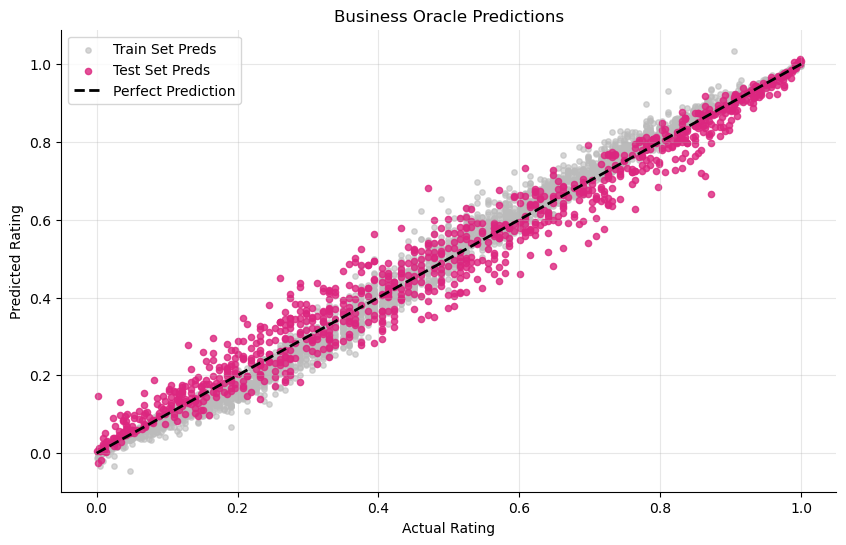

Business Oracle Train Set R² score: 0.9886
Business Oracle Test Set R² score: 0.9684

Model Performance Summary:
Training R²:   0.9886
Test R²:       0.9684
Overfitting:   No (0.0202)
Performance:   Excellent


In [ ]:
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test):
    #Create scatter plot
    plt.figure(figsize=(10,6))
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=15, c="#BBBBBB", alpha=0.6) #train set in gray
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=20, c="#DC267F", alpha=0.8) #test set in magenta
    plt.plot([0,1], [0,1], label="Perfect Prediction", linewidth=2, c="k", linestyle='--') #target line in black

    #Set axis labels and title
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title("Tax Oracle Predictions")

    #Turn off top and right spines
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.legend() #Display legend
    plt.grid(True, alpha=0.3)
    plt.show() #Show plot

    #Calculate R2 score for train and test sets
    train_r2 = r2_score(ratings_train, preds_train)
    test_r2 = r2_score(ratings_test, preds_test)
    
    print(f"Tax Oracle Train Set R² score: {train_r2:.4f}")
    print(f"Tax Oracle Test Set R² score: {test_r2:.4f}")
    
    return train_r2, test_r2

# Extract the actual ratings from train and test data
ratings_train = train_data['target'].values
ratings_test = test_data['target'].values

# Remove the target column to get just the features for prediction
train_features = train_data.drop('target', axis=1)
test_features = test_data.drop('target', axis=1)

# Make predictions on the train and test features
print("Making predictions on train set...")
preds_train = tax_oracle.model.predict(train_features)

print("Making predictions on test set...")
preds_test = tax_oracle.model.predict(test_features)

# Create the plot and get R² scores
train_r2, test_r2 = plot_and_r2(preds_train, preds_test, ratings_train, ratings_test)

# Additional analysis
print(f"\nModel Performance Summary:")
print(f"{'='*40}")
print(f"Training R²:   {train_r2:.4f}")
print(f"Test R²:       {test_r2:.4f}")
print(f"Overfitting:   {'Yes' if (train_r2 - test_r2) > 0.1 else 'No'} ({train_r2 - test_r2:.4f})")
print(f"Performance:   {'Excellent' if test_r2 > 0.9 else 'Good' if test_r2 > 0.8 else 'Fair' if test_r2 > 0.6 else 'Poor'}")

In [6]:
# save model in pkl file
tax_oracle.save_model('tax_oracle_model.pkl')

# --- IGNORE ---
# instructions on how to use exported model
# from oracle import BusinessOracle
# business_oracle = BusinessOracle.load_model("business_oracle_model.pkl")
# --- IGNORE ---